### 统计学：检验心理学现象

在下方单元格中回答问题并执行相关代码，你可以 [参考项目指导](https://github.com/udacity/new-dand-advanced-china/blob/master/%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1/%E7%BB%9F%E8%AE%A1%E5%AD%A6%EF%BC%9A%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1.md) 并在正式提交前查看 [项目要求](https://review.udacity.com/#!/rubrics/305/view)。提交时请将 Jupyter notebook 导出成 HTML 或者 PDF 进行提交（File -> Download As）。

背景信息

在一个Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。

调查问题

作为一般说明，请确保记录你在创建项目时使用或参考的任何资源。作为项目提交的一部分，你将需要报告信息来源。

(1) 我们的自变量是什么？因变量是什么？


#### 自变量： 一致文字条件和不一致文字条件

#### 因变量： 说出墨色名称的时间

(2) 此任务的适当假设集是什么？你需要以文字和数学符号方式对假设集中的零假设和对立假设加以说明，并对数学符号进行定义。你想执行什么类型的统计检验？为你的选择提供正当理由（比如，为何该实验满足你所选统计检验的前置条件）。

#### 假设集：

(<font color=red> revise after first reviewing, add key word: population mean, not sample mean </font>)
定义：将一致文字条件下平均说出墨色时间的值记为$\mu_c$, 将不一致文字条件下平均说出墨色时间的值记为$\mu_{uc}$

零假设 H0：一致文字条件和不一致文字条件说出墨色时间<font color=red>总体</font>均值相同，i.e., $\mu_c = \mu_{uc}$

对立假设 HA： 不一致文字下说出墨色时间总体均值不同，i.e., $\mu_c \not= \mu_{uc}$. 并且，我们会猜测两者哪个值更大

#### 检验类型和原因 

(<font color=red> revise after first reviewing, add more detail </font>)
类型：执行T检验,更具体而言，应该是配对样本T检验。因为该项目是在同一样本组下，比较两种treatment的影响。当然，除此种情况外,配对样本T检验还包括两种情况：1，前后两组样本有基因相关性；2，前后两组有很多相同属性

理由：假设样本来自近似正太分布的总体，样本数量较少（一般小于30）且无法获知总体信息

现在轮到你自行尝试 Stroop 任务了。前往此链接，其中包含一个基于 Java 的小程序，专门用于执行 Stroop 任务。记录你收到的任务时间（你无需将时间提交到网站）。现在下载此数据集，其中包含一些任务参与者的结果。数据集的每行包含一名参与者的表现，第一个数字代表他们的一致任务结果，第二个数字代表不一致任务结果。

(3) 报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。

In [84]:
# 在这里执行你的分析
# import what you will use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats 

# get and check the data
stroop_data = pd.read_csv('stroopdata.csv')
print(stroop_data.describe(), stroop_data.info())

# get the mean value for each variable
con_mean = stroop_data['Congruent'].mean()
inc_mean = stroop_data['Incongruent'].mean()
print("stroop_con_mean and stroop_inc_mean are %f and %f" % (con_mean, inc_mean))

# get the std value for each variable
con_std = stroop_data['Congruent'].std()
inc_std = stroop_data['Incongruent'].std()
print("stroop_con_std and stroop_inc_std are %f and %f" % (con_std, inc_std))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 456.0 bytes
(       Congruent  Incongruent
count  24.000000    24.000000
mean   14.051125    22.015917
std     3.559358     4.797057
min     8.630000    15.687000
25%    11.895250    18.716750
50%    14.356500    21.017500
75%    16.200750    24.051500
max    22.328000    35.255000, None)
stroop_con_mean and stroop_inc_mean are 14.051125 and 22.015917
stroop_con_std and stroop_inc_std are 3.559358 and 4.797057


(4) 提供显示样本数据分布的一个或两个可视化。用一两句话说明你从图中观察到的结果。

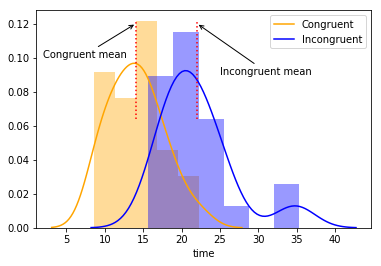

In [75]:
# 在这里创建可视化图表
fig = plt.figure()
sns.distplot(stroop_data['Congruent'], color='orange', kde_kws={"label": "Congruent"}, axlabel='time')
sns.distplot(stroop_data['Incongruent'], color='blue', kde_kws={"label": "Incongruent"}, axlabel='time')
plt.axvline(con_mean, color='red', ls='dotted', ymin=0.5, ymax=0.95)
plt.annotate('Congruent mean', xy=(con_mean, 0.12), xytext=(2, 0.1), arrowprops=dict(arrowstyle="->", facecolor='black'))
plt.axvline(inc_mean, color='red', ls='dotted', ymin=0.5, ymax=0.95)
plt.annotate('Incongruent mean', xy=(inc_mean, 0.12), xytext=(25, 0.09), arrowprops=dict(arrowstyle="->", facecolor='black'))

#### From the figure,  I get:
the average mean for Incongruent is much bigger that the one for Congruent

(5) 现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？

In [82]:
# 在这里执行统计检验

t, p = stats.ttest_rel(stroop_data['Incongruent'], stroop_data['Congruent'])
print ('t is %.4f and p is %.4f' % (t, p))


# we can try use normal method to get t and p
t = (inc_mean - con_mean)/((stroop_data['Congruent'] - stroop_data['Incongruent']).std()/np.sqrt(len(stroop_data)))

t is 8.0207 and p is 0.0000


(<font color=red> revise after first reviewing, add significance and confidence value </font>)
Since p is smaller than significance value 0.05 (usually we set significance value $\alpha$ 0.05, which means confidence value is 0.95), even nearly 0, we can reject the Null hyperthesis. from the result, the average mean for Incongruent is much bigger than the one for Congruent, and this makes sense, because the incongruent test adds more interference.